<a href="https://colab.research.google.com/github/NotMajooj/lia1_2025_2/blob/main/lia1_2025_2%20/Entregas%20-%20Maria%20J%C3%BAlia%20Bicharelli%20da%20Silva/Comidakk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<div class="container">
    <img src='https://github.com/NotMajooj/lia1_2025_2/blob/main/Entregas%20-%20Maria%20Júlia%20Bicharelli%20da%20Silva/download.jpg?raw=true' align='left' width='200'  height='200' />
</div>

<h1> <font color='Pink'>Projeto Matéria LIA - Reconhecimento de alimentos</font></h1>
Notebook desenvolvido por: <a href="https://github.com/NotMajooj">Maria Júlia Bicharelli da Silva</a>
<hr>

Consirte em uma máquina capaz de reconhecer entre 9 tipos de alimentos:  <font color = 'lightyellow'>*'caesar salad', 'hamburger', 'pizza', 'apple pie', 'french fries', 'sushi', 'ice cream', 'steak' e 'donuts'*</font>. Que foram separadas em <font color = 'lightyellow'>saudáveis ou não. </font>
 Utilizando o <font color = 'lightblue'>**dataset**</font> Food101 do <font color='lightblue'>***Kaggle***</font>

Link :) https://www.kaggle.com/datasets/dansbecker/food-101

Esse dataset dispõe de muitas imagens de 101 tipos diferentes de comida, mas como usarei só 9, usei uma forma reduzida dele.

Me diverti e irritei muito com o projeto, espero que goste! :D
<hr>

# Instalação das dependências necessárias e importações

##Instalação:

In [ ]:
!pip install -q tensorflow
!pip install -q tensorflow-datasets

##Importações:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
import tensorflow_datasets as tfds
import os

from platform import python_version
print('Versão do Python neste Notebook:', python_version())
print('Versão do TensorFlow:', tf.__version__)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Versão do Python neste Notebook: 3.12.11
Versão do TensorFlow: 2.19.0


#Definição das classes e carregamento do dataset

##Classes:

In [ ]:
selected_classes = [
    "caesar_salad", "hamburger", "pizza", "apple_pie", "french_fries",
    "sushi", "ice_cream", "steak", "donuts"
]

nomes_classes = selected_classes
num_classes = len(selected_classes)

nutri_map = {
    "caesar_salad": "Saudável",
    "sushi": "Saudável",
    "steak": "Moderado",
    "apple_pie": "Não saudável",
    "hamburger": "Não saudável",
    "pizza": "Não saudável",
    "french_fries": "Não saudável",
    "ice_cream": "Não saudável",
    "donuts": "Não saudável"
}

##Dataset:

In [ ]:
(ds_train, ds_val), ds_info = tfds.load('food101',
                                        split=['train', 'validation'],
                                        with_info=True,
                                        as_supervised=True)

class_names = ds_info.features['label'].names
class_to_id = {name: i for i, name in enumerate(class_names)}

selected_classes = [
    "caesar_salad",
    "hamburger",
    "pizza",
    "apple_pie",
    "french_fries",
    "sushi",
    "ice_cream",
    "steak",
    "donuts"
]

nomes_classes = selected_classes
num_classes = len(selected_classes)

selected_ids = [class_to_id[name] for name in selected_classes]

nutri_map = {
    "caesar_salad": "Saudável",
    "sushi": "Saudável",
    "steak": "Moderado",
    "apple_pie": "Não saudável",
    "hamburger": "Não saudável",
    "pizza": "Não saudável",
    "french_fries": "Não saudável",
    "ice_cream": "Não saudável",
    "donuts": "Não saudável"
}

def filter_classes(image, label):
    return tf.reduce_any(tf.equal(label, selected_ids))

def relabel(image, label):
    label = tf.cast(label, tf.int64)

    new_label = tf.constant(0, dtype=tf.int64)

    for i, class_id in enumerate(selected_ids):
        new_label = tf.cond(
            tf.equal(label, class_id),
            lambda: tf.constant(i, dtype=tf.int64),
            lambda: new_label
        )

    return image, new_label

ds_train_filtered = ds_train.filter(filter_classes).map(relabel)
ds_val_filtered = ds_val.filter(filter_classes).map(relabel)

#Pré-Processamento e Treinamento:

##Pré-Processamento:

In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = ds_train_filtered.map(preprocess).batch(BATCH_SIZE).shuffle(500)
val_ds = ds_val_filtered.map(preprocess).batch(BATCH_SIZE)

##Visualização das imagens:

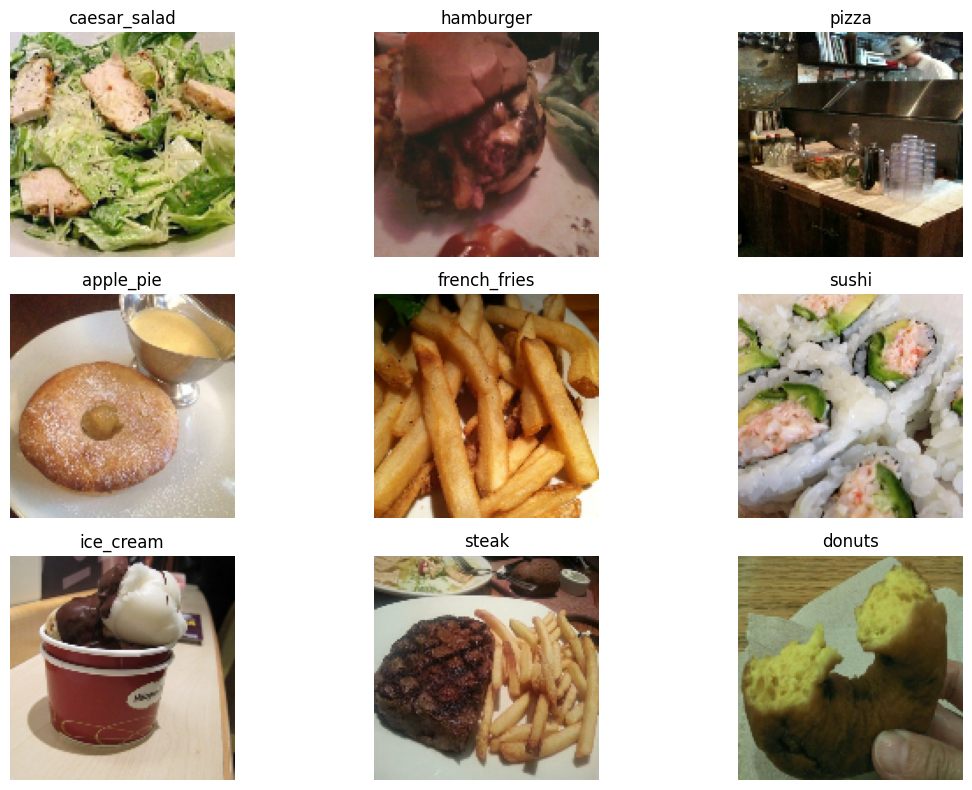

In [ ]:
def visualiza_imagens_por_classe(dataset):
    plt.figure(figsize=(12, 8))
    imagens_por_classe = {}

    for images, labels in dataset:
        for i in range(len(images)):
            classe = int(labels[i].numpy())
            if classe not in imagens_por_classe:
                imagens_por_classe[classe] = images[i].numpy()

            if len(imagens_por_classe) == num_classes:
                break

        if len(imagens_por_classe) == num_classes:
            break

    for i, classe in enumerate(sorted(imagens_por_classe.keys())):
        plt.subplot(3, 3, i+1)
        img = imagens_por_classe[classe]
        plt.imshow(img)
        plt.title(nomes_classes[classe])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualiza_imagens_por_classe(train_ds)

##Modelo:

In [ ]:
modelo = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

##Treinamento:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = modelo.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.3417 - loss: 1.8446 - val_accuracy: 0.3924 - val_loss: 1.7334
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.3935 - loss: 1.7244 - val_accuracy: 0.4258 - val_loss: 1.6203
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.4362 - loss: 1.6128 - val_accuracy: 0.4467 - val_loss: 1.5560
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.4879 - loss: 1.4651 - val_accuracy: 0.4582 - val_loss: 1.5217
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.5498 - loss: 1.3006 - val_accuracy: 0.4818 - val_loss: 1.4893


##Avaliação:

In [ ]:

erro, acc = modelo.evaluate(val_ds, verbose=1)
print(f"Acurácia: {acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 50s 693ms/step - accuracy: 0.5055 - loss: 1.4396
Acurácia: 0.4818


##Matriz de Confusão

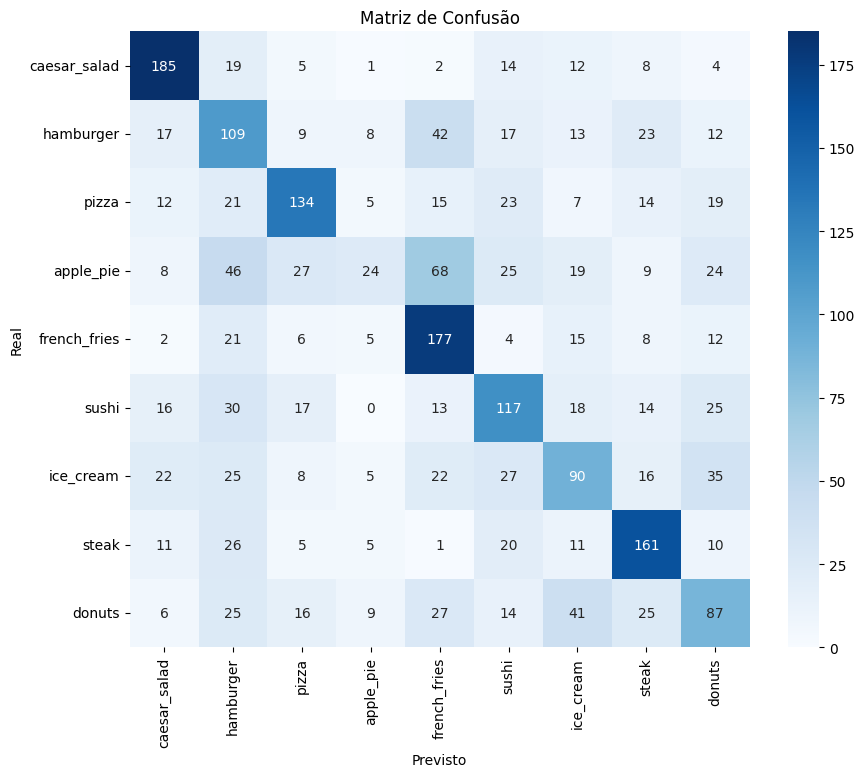

In [ ]:
y_true = []
y_pred_classes = []

for images, labels in val_ds:
    predictions = modelo.predict(images, verbose=0)
    batch_pred_classes = np.argmax(predictions, axis=1)

    batch_true = labels.numpy()

    y_true.extend(batch_true)
    y_pred_classes.extend(batch_pred_classes)

y_true = np.array(y_true)
y_pred_classes = np.array(y_pred_classes)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nomes_classes,
            yticklabels=nomes_classes)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#Teste

##Inserção de nova imagem:

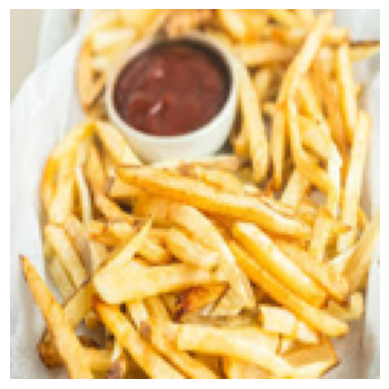

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Classe prevista: french_fries
Classificação nutricional: Não saudável


In [ ]:
try:
    nova_imagem = Image.open("/content/Image7.jpg")
    nova_imagem = nova_imagem.resize((IMG_SIZE, IMG_SIZE))

    plt.imshow(nova_imagem)
    plt.axis("off")
    plt.show()

    nova_array = np.expand_dims(np.array(nova_imagem) / 255.0, axis=0)
    pred = modelo.predict(nova_array)

    classe_prevista = nomes_classes[np.argmax(pred)]
    print("Classe prevista:", classe_prevista)
    print("Classificação nutricional:", nutri_map[classe_prevista])
except:
    print("Imagem não encontrada.")

##Gráfico de Desempenho:

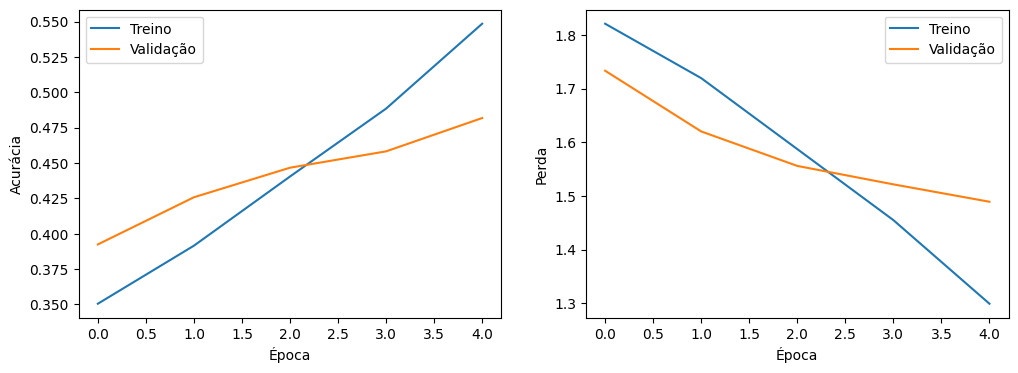

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend()

plt.show()